In [2]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv',
                  index_col='Month',
                  parse_dates=True)

In [6]:
#Checking data
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


It is a 12 years data consiste of 144 months.
12*12 = 144

In [7]:
#Checking index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
#Changing the index frequency
data.index.freq = 'MS'

In [9]:
#Checking index
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
#Checking data
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Exponential Weighted Moving Average

In [18]:
#Creating Exponential Weighted Moving Average
span = 12 #12 monhts
alpha = 2/(span+1) #
data['EWMA_12'] = data['Thousands of Passengers'].ewm(alpha = alpha,
                                                     adjust = False).mean()

In [19]:
#Checking data
data.head()

,Thousands of Passengers,EWMA_12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


# Simple Exponential Smoothing

In [12]:
#Creating Simple Exponential Smoothing
model = SimpleExpSmoothing(data['Thousands of Passengers'])
result = model.fit(smoothing_level=alpha, optimized=False)

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
#Extracting summary
result.summary()

Dep. Variable:,Thousands of Passengers,No. Observations:,144
Model:,SimpleExpSmoothing,SSE,344625.939
Optimized:,False,AIC,1124.378
Trend:,None,BIC,1130.317
Seasonal:,None,AICC,1124.666
Seasonal Periods:,None,Date:,"Sun, 21 Mar 2021"
Box-Cox:,False,Time:,17:09:25
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1538462,alpha,False
initial_level,112.00000,l.0,False


In [14]:
#Adding in the data
data['SES_12'] = result.fittedvalues.shift(-1)

In [15]:
#Checking the data
data.head()

,Thousands of Passengers,EWMA_12,SES_12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


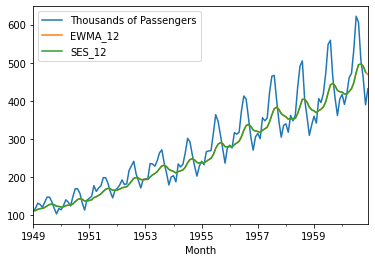

In [17]:
#Creating plot
data.plot();

# Double Exponential Smoothing

In [21]:
#Creating double exponential smoothing with additive
data['DES_add_12'] = ExponentialSmoothing(data['Thousands of Passengers'], 
                                          trend='add').fit().fittedvalues.shift(-1)

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [22]:
#Checking the data
data.head()

,Thousands of Passengers,EWMA_12,DES_add_12
Month,,,
1949-01-01,112,112.000000,113.474828
1949-02-01,118,112.923077,119.464366
1949-03-01,132,115.857988,133.477561
1949-04-01,129,117.879836,130.543312
1949-05-01,121,118.359861,122.528126


In [22]:
#Extracting column names
data.columns

Index(['Thousands of Passengers', 'EWMA_12', 'SES_12', 'DES_add_12'], dtype='object')

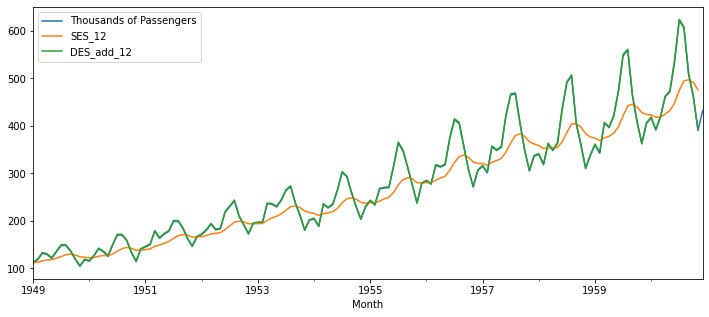

In [23]:
#Plotting data
data[['Thousands of Passengers', 'SES_12', 'DES_add_12']].plot(figsize = (12,5));

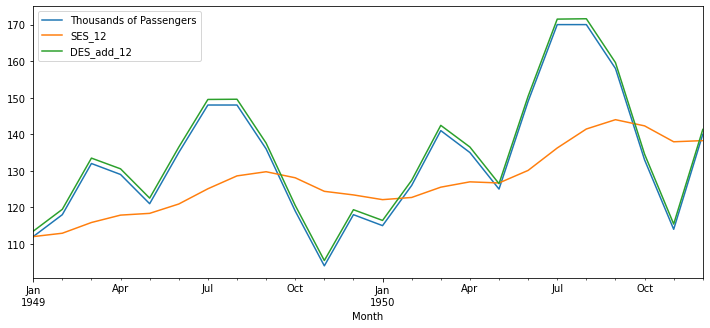

In [24]:
#Plotting data for just first two year from 1949 to 1950
data[['Thousands of Passengers', 'SES_12', 'DES_add_12']].iloc[:24].plot(figsize = (12,5));

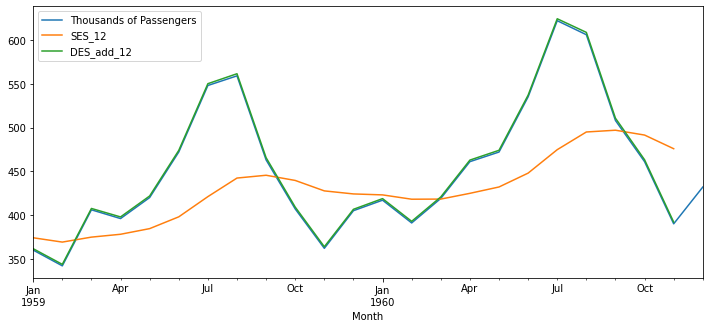

In [26]:
#Plotting data for just last two year from 1949 to 1950
data[['Thousands of Passengers', 'SES_12', 'DES_add_12']].iloc[-24:].plot(figsize = (12,5));

In [27]:
#Creating double exponential smoothing with multiplicative
data['DES_mul_12'] = ExponentialSmoothing(data['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [28]:
#Checking the data
data.head()

,Thousands of Passengers,EWMA_12,SES_12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.474828,114.978251
1949-02-01,118,112.923077,112.923077,119.464366,121.191659
1949-03-01,132,115.857988,115.857988,133.477561,135.802180
1949-04-01,129,117.879836,117.879836,130.543312,132.657709
1949-05-01,121,118.359861,118.359861,122.528126,124.213566


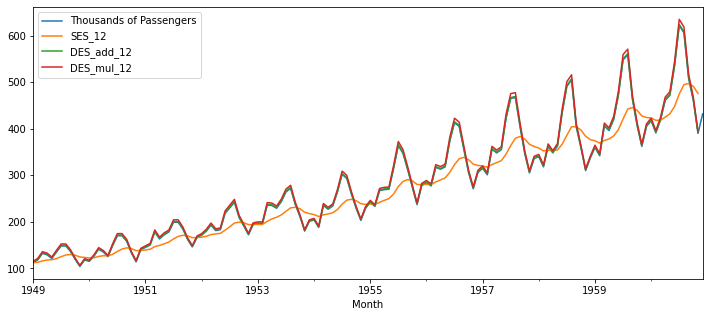

In [29]:
#Plotting data
data[['Thousands of Passengers', 'SES_12', 'DES_add_12', 'DES_mul_12']].plot(figsize = (12,5));

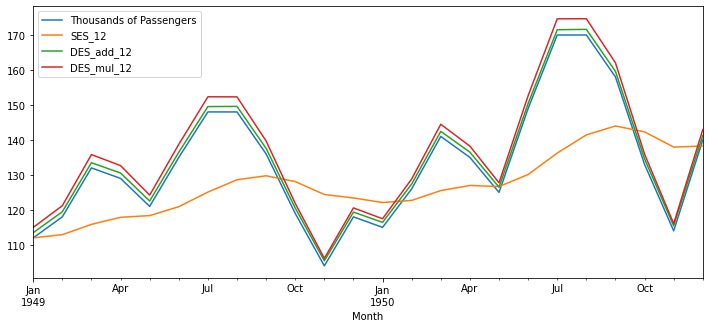

In [30]:
#Plotting data for just first two year from 1949 to 1950
data[['Thousands of Passengers', 'SES_12', 'DES_add_12','DES_mul_12']].iloc[:24].plot(figsize = (12,5));

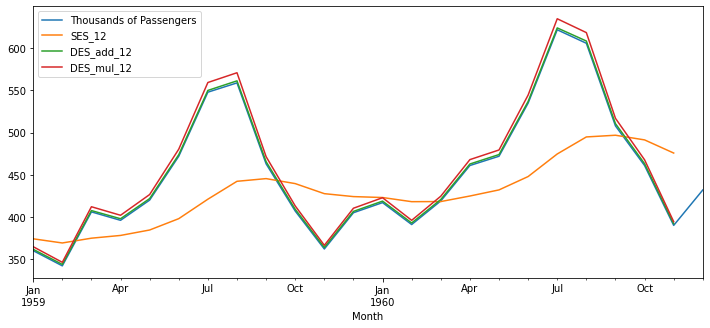

In [31]:
#Plotting data for just last two year from 1949 to 1950
data[['Thousands of Passengers', 'SES_12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize = (12,5));

# Tripple Exponential Smoothing

In [23]:
#Creating triple exponential smoothing
data['TES_mul_12'] = ExponentialSmoothing(data['Thousands of Passengers'], 
                                          trend='mul', 
                                          seasonal='mul', 
                                          seasonal_periods=12).fit().fittedvalues

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


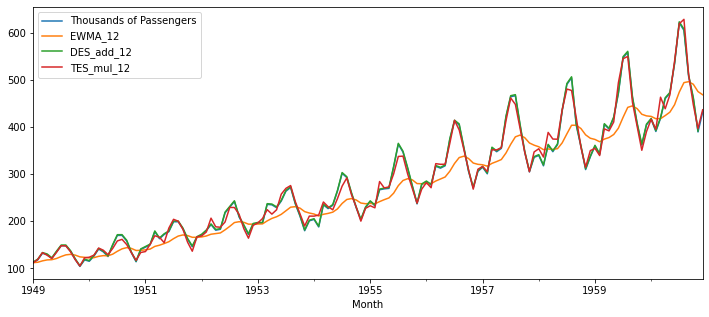

In [24]:
#Creating plot
data.plot(figsize = (12,5));

In [35]:
#Extracting column names
data.columns

Index(['Thousands of Passengers', 'EWMA_12', 'SES_12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

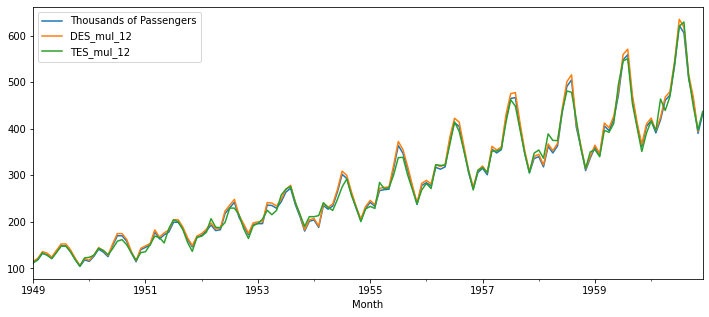

In [38]:
#Creating plot
data[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].plot(figsize = (12,5));

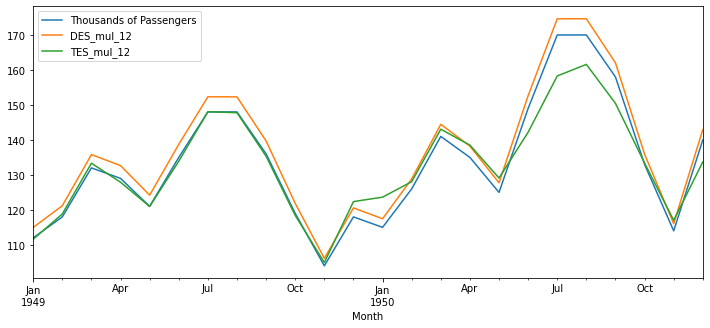

In [39]:
#Creating plot
data[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize = (12,5));

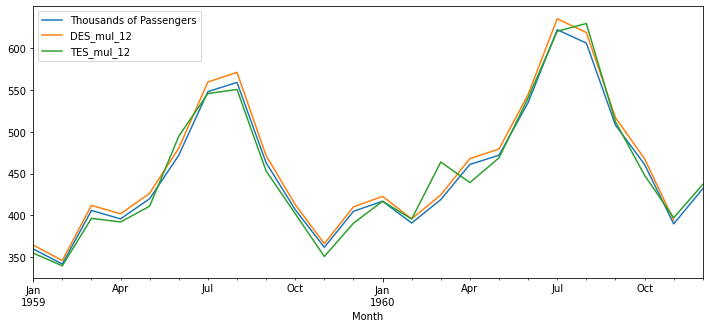

In [40]:
#Creating plot
data[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize = (12,5));